Part 1 - Accuracy and documenation of your codes

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
data=np.array([3,4,2,5,7,6,8]) #class example data set used to validate code 

In [3]:
data #displays data

array([3, 4, 2, 5, 7, 6, 8])

In [4]:
#The number of data points
n=np.count_nonzero(data)

In [5]:
#Code was modified from provided minitab macro 
#Initialize all necessary arrays 
k=1
mm=n-k
cmean=np.zeros(n)
csum=np.zeros(n)
csize=np.ones(n)
start=np.ones(n)
boundary=np.zeros(n)
di=np.zeros(mm)
ls=np.zeros(mm)
ds=np.zeros(mm)
dstar=np.zeros(mm)
lstar=np.zeros(mm)

In [6]:
#Get the mean and size of first clusters (i)
i=0
while (i<n):
    cmean[i]=data[i]
    csum[i]=data[i]
    start[i]=i+1
    boundary[i]=i+1
    i=i+1

In [7]:
#Create D vector
i=0
while (i<mm):
    top = cmean[i]-cmean[i+1]
    bottom = (csize[i]+csize[i+1])/(csize[i]*csize[i+1])
    di[i]=abs(top)/math.sqrt(bottom)
    i=i+1

In [8]:
#Begin Multiple Iterations 
j=0
while j<mm:
    m=n-k

    #Find min d
    min_d=10000000
    i=0
    while (i<mm):
        if 0.001<di[i]<min_d:
            min_d=di[i]
            li=np.int(boundary[i])-1 #encountered lots of array issues since Python starts at zero instead of one
            si=np.int(start[i])-1 #array issue
            ei=np.int(boundary[i+1])-1 #array issue
        i=i+1

    dstar[m-1]=min_d #array issue
    lstar[m-1]=li+1 #array issue

    #Join clusters
    csum[si]=csum[li]+csum[ei]
    csize[si]=csize[li]+csize[ei]
    cmean[si]=csum[si]/csize[si]
    start[si]=start[si]
    boundary[si]=boundary[ei]

    csum[ei]=csum[si]
    csize[ei]=csize[si]
    cmean[ei]=cmean[si]
    start[ei]=start[si]
    boundary[ei]=boundary[si]

    di[li]=0

    a=si-1
    if a>0:
        top=cmean[a]-cmean[si]
        bottom=(csize[a]+csize[si])/(csize[a]*csize[si])
        di[a]=abs(top)/math.sqrt(bottom)

    b=ei+1
    
    if b<n:
        top=cmean[ei]-cmean[ei+1]
        bottom=(csize[ei]+csize[ei+1])/(csize[ei]*csize[ei+1])
        di[ei]=abs(top)/math.sqrt(bottom)

    k=k+1
    j=j+1

In [9]:
dstar #displays dstar vector

array([4.58257569, 1.73205081, 1.22474487, 1.22474487, 0.70710678,
       0.70710678])

In [10]:
lstar #displays lstar vector

array([3., 6., 4., 2., 5., 1.])

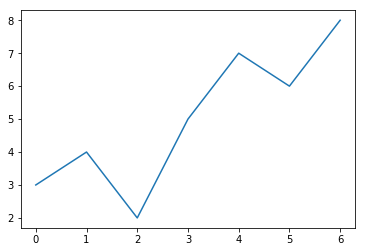

In [11]:
plt.plot(data) #time series of data

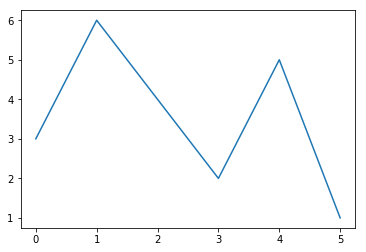

In [12]:
plt.plot(lstar) #time series of location; change point occurs at boundary 3

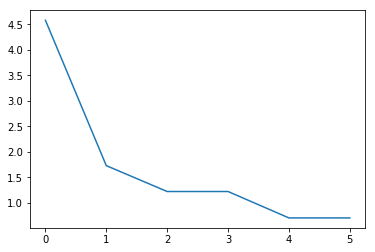

In [13]:
plt.plot(dstar) #time series plot of distance shows 1 change point 

Part 2 - Apply your codes on a data set

In [14]:
data=np.loadtxt("test641data.txt")

In [15]:
data #displays data

array([20.99, 19.87, 18.75, 20.59, 20.45, 20.68, 21.06, 19.47, 19.88,
       22.96, 19.27, 17.46, 16.62, 20.06, 18.02, 18.08, 18.07, 21.47,
       20.22, 18.55, 21.3 , 26.42, 26.54, 25.5 , 25.28, 22.64, 25.79,
       24.92, 22.16, 24.2 , 24.73, 25.  , 26.94, 26.72, 27.68, 24.96,
       21.46, 24.24, 25.29, 20.98])

In [16]:
#The number of data points
n=np.count_nonzero(data)

In [17]:
#Code was modified from provided minitab macro 
#Initialize all necessary arrays 
k=1
mm=n-k
cmean=np.zeros(n)
csum=np.zeros(n)
csize=np.ones(n)
start=np.ones(n)
boundary=np.zeros(n)
di=np.zeros(mm)
ls=np.zeros(mm)
ds=np.zeros(mm)
dstar=np.zeros(mm)
lstar=np.zeros(mm)

In [18]:
#Get the mean and size of first clusters (i)
i=0
while (i<n):
    cmean[i]=data[i]
    csum[i]=data[i]
    start[i]=i+1
    boundary[i]=i+1
    i=i+1

In [19]:
#Create D vector
i=0
while (i<mm):
    top = cmean[i]-cmean[i+1]
    bottom = (csize[i]+csize[i+1])/(csize[i]*csize[i+1])
    di[i]=abs(top)/math.sqrt(bottom)
    i=i+1

In [20]:
#Begin Multiple Iterations 
j=0
while j<mm:
    m=n-k

    #Find min d
    min_d=10000000
    i=0
    while (i<mm):
        if 0.001<di[i]<min_d:
            min_d=di[i]
            li=np.int(boundary[i])-1 #encountered lots of array issues since Python starts at zero 
            si=np.int(start[i])-1 #array issue
            ei=np.int(boundary[i+1])-1 #array issue
        i=i+1

    dstar[m-1]=min_d #array issue
    lstar[m-1]=li+1 #array issue

    #Join clusters
    csum[si]=csum[li]+csum[ei]
    csize[si]=csize[li]+csize[ei]
    cmean[si]=csum[si]/csize[si]
    start[si]=start[si]
    boundary[si]=boundary[ei]

    csum[ei]=csum[si]
    csize[ei]=csize[si]
    cmean[ei]=cmean[si]
    start[ei]=start[si]
    boundary[ei]=boundary[si]

    di[li]=0

    a=si-1
    if a>0:
        top=cmean[a]-cmean[si]
        bottom=(csize[a]+csize[si])/(csize[a]*csize[si])
        di[a]=abs(top)/math.sqrt(bottom)

    b=ei+1
    
    if b<n:
        top=cmean[ei]-cmean[ei+1]
        bottom=(csize[ei]+csize[ei+1])/(csize[ei]*csize[ei+1])
        di[ei]=abs(top)/math.sqrt(bottom)

    k=k+1
    j=j+1

In [21]:
dstar #displays dstar vector

array([1.61309532e+01, 4.09816571e+00, 3.33940464e+00, 3.44502823e+00,
       2.98087246e+00, 2.75898556e+00, 2.32383483e+00, 2.69852120e+00,
       2.62469046e+00, 1.69116472e+00, 1.53863847e+00, 2.15062975e+00,
       1.05655099e+00, 1.87385965e+00, 1.86484137e+00, 1.12795749e+00,
       1.75225807e+00, 1.73493756e+00, 6.85893578e-01, 1.37171426e+00,
       1.17779455e+00, 1.09000000e+00, 8.83883476e-01, 7.91959595e-01,
       7.42462120e-01, 6.94022094e-01, 6.15182900e-01, 5.93969696e-01,
       5.42970226e-01, 4.21465697e-01, 2.89913780e-01, 1.90918831e-01,
       1.55563492e-01, 1.55563492e-01, 1.30639453e-01, 9.89949494e-02,
       8.48528137e-02, 4.49073120e-02, 7.07106781e-03])

In [22]:
lstar #displays lstar vector

array([21., 36., 10., 17., 32., 25., 39., 37.,  9., 26., 28., 29., 20.,
       19., 35., 11., 13., 14.,  3.,  2.,  7., 23., 18.,  1., 38., 34.,
       27., 12., 30.,  6.,  8., 31., 33., 24.,  5.,  4., 22., 15., 16.])

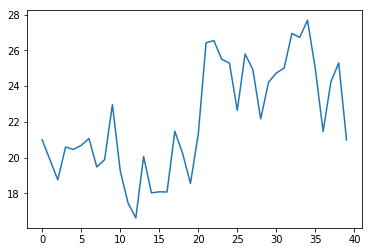

In [23]:
plt.plot(data) #time series of data

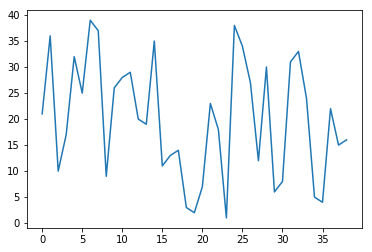

In [24]:
plt.plot(lstar) #time series of location; change point occurs at location 21

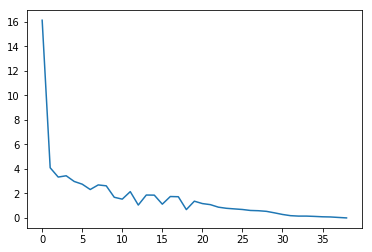

In [25]:
plt.plot(dstar) #time series plot of distance; time series plot shows 1 change point 

These results were verified with the provided Minitab Macro.
Time series plots of x, location, and distance are shown below and match the results of this python code. 

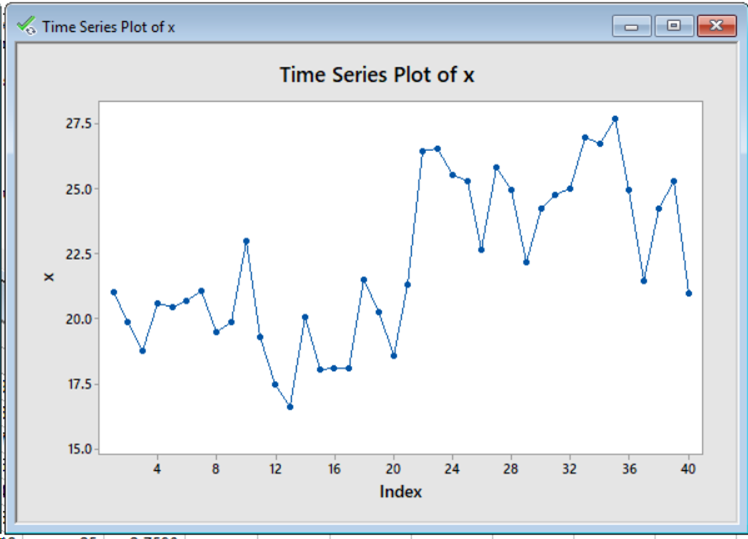

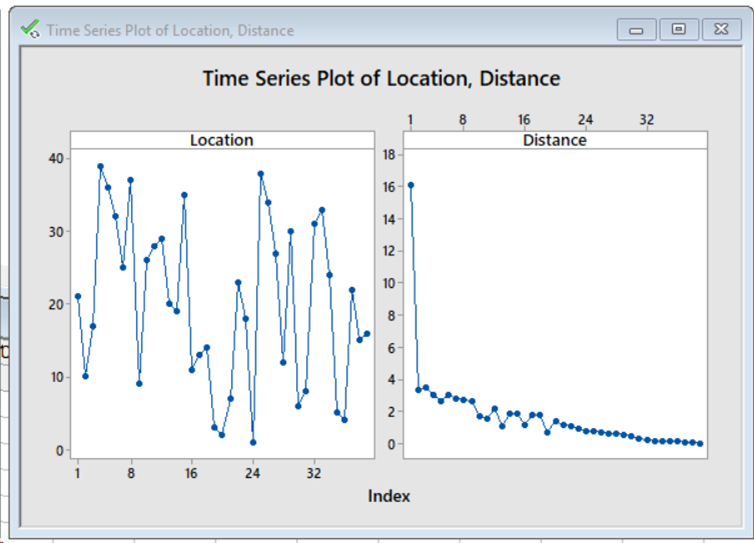

This data set is not in a steady state as evidenced by the change point. It does not conform to the i.i.d. assumption as there is a change in the mean. 